# Prediction Model for Computing Insurance Premiums

## 1. Defining the Question

---



> To develop a model which will predict insurance premiums that assists insurance companies manage risk and ensure financial stability.



### a) Specifying the Data Analytic Question

> According to the International Monetary Fund (IMF) working paper titled "Insurance Premiums: Determinants and Policy Implications," there are several challenges that insurance companies face when determining insurance premiums. Insurance companies must assess the risk of an insurance event occurring for each policyholder, taking into account a wide range of factors such as the policyholder's age, gender, medical history, and the type and cost of coverage. This can be a complex and time-consuming process.

> **Problem Statement:** 
The goal of this project is to build a predictive model that can accurately estimate insurance premiums based on a variety of input features.  

### b) Defining the Metric for Success

The project will be considered a success if the developed predictive model is able to explain 80% of the variation of the target variable and have a Mean Absolute Error (MAE) of less than 5%
.

### c) Recording the Experimental Design

1.Data Collection: Gather data on the variables to be included in the model. These includes variables such as age, gender, medical history, and the type and cost of coverage which are relevant to the insurance premiums.

2.Clean and preprocess the data: The data will be cleaned and preprocessed to ensure that it is in a usable form. This will involve tasks such as removing missing or invalid data, scaling the variables, and encoding categorical variables.

3.Split the data into training and test sets: The data will be split into a training set and a test set. The training set will be used to fit the linear regression model, while the test set will be used to evaluate the model's performance.

4.Fit the linear regression model: The data will be fit to a linear regression model to the training data by estimating the values of the coefficients for each predictor variable. Various software packages to fit the model, such as R or Python's scikit-learn library can be used.

5.Evaluate the model's performance: The test set will be used to evaluate the model's performance by comparing the predicted insurance premiums to the actual premiums. There are several metrics that you can use to assess the model's performance, such as mean squared error and R-squared.

6.Use the model to make predictions: After fitting and evaluating the model, it will be used to make predictions about the insurance premiums for new customers, based on their values for the predictor variables.

7.Conclusions and Recommendations

### d) Data Understanding 

The data set to be used https://www.kaggle.com/datasets/noordeen/insurance-premium-prediction comprises of 1338 rows and 7 columns. This includes 4 numerical and 3 cotegorical features which will be useful in selecting the target and predictor variables in this analysis. 

| Dataset Features | 
|:------|
|i. age - This is the age of an individual in years|
|iii. bmi - This is the body mass index of an individual |
|iv. children - This indicates the number of dependents covered by the health insurance|
|v. smoker - This describes whether an individual is a smoker or non-smoker (yes=smoker and no=non-smoker)|
|vi. region - This describes the beneficiary's residential area in the USA |
|vii. expenses - This is the individual's medical costs billed by health insurance 
 



## 2. Reading the Data

In [431]:
# loading the required libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
import statistics
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [432]:
# Loading the Data from the source i.e. csv

insurance_data = pd.read_csv('Insurance Premium dataset.csv')

insurance_data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86




## 3. Checking the Data

In [433]:
# Determining the no. of records in our dataset

insurance_data.shape

(1338, 7)

The data set contains 1338 rows and 7 columns.

In [434]:
# Previewing the top of our dataset

insurance_data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [435]:
# Previewing the bottom of our dataset

insurance_data.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [436]:
# Checking whether each column has an appropriate datatype 

insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


It can be noted that the data set does not contain any missing values. Additionally, the data type for each of the features is appropriate. 

In [437]:
# Check for duplicated rows

insurance_data.duplicated().any()

True

The data contains duplicated values which will be cleaned in the next few steps. 

In [438]:
# Check the summary statistics

insurance_data.describe(include = "all")

,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.665471,1.094918,NaN,NaN,13270.422414
std,14.049960,NaN,6.098382,1.205493,NaN,NaN,12110.011240
min,18.000000,NaN,16.000000,0.000000,NaN,NaN,1121.870000
25%,27.000000,NaN,26.300000,0.000000,NaN,NaN,4740.287500
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.030000
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16639.915000


Based off the above, we observe the following:
>a. The mean age in the data set is 39 while the standard deviation is 14 years.

>b. The mean bmi in the data set is 30.70 while the standard deviation is 6.10.

>c. The mean number of children in the data set is 2 while the standard deviation is 2 children.

>d. The mean insurance expense in the data set is 13,270.42 while the standard deviation is 12,110.01.

The data also includes categorical data where the majority sex is **male** with a frequency of 676. Moreover, the group contains a high number of **non-smokers** at 1064 individuals while most individuals are from the **southeast region** at 364. 

    

## 4. External Data Source Validation

The Kaiser Family Foundation (KFF) is a nonprofit organization that focuses on domestic health concerns and the U.S.'s position in international health policy. KFF creates and manages its own journalism, communications, and policy analysis initiatives, occasionally in collaboration with large news outlets. KFF works as a neutral resource for the public, the media, the health policy community, and policymakers by providing information, analysis, and journalism.

In it's report titled "Employer Health Benefits Survey" KFF established annual premiums for employer-sponsored family health coverage reaching USD 21,342. For single coverage, the typical deductible for covered employees in a plan with a general annual deductible is USD 1,644.

To verify the above, this is confirmed by plotting a histogram below.

<AxesSubplot:ylabel='Frequency'>

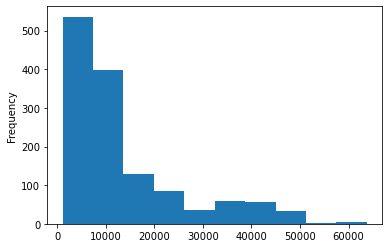

In [439]:
insurance_data['expenses'].plot(kind = "hist")


From the graph, the minimum contribution is USD 1,121 which is not far off from USD 1,644 as per the finding in the report. Aditionally, it can be noted that most insurance premium cost between USD 5000 TO 25,000. 

This data set is fit for use in the development of the prediction model. 

## 5. Tidying the Dataset

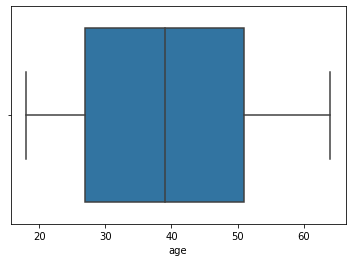

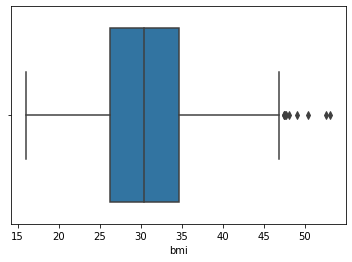

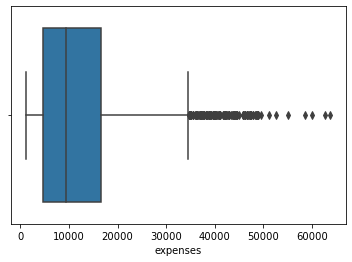

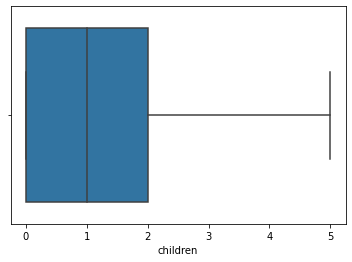

In [440]:
# Checking for Outliers

numeric_data = ['age','bmi','expenses','children']

for col in numeric_data:
    sns.boxplot(x = insurance_data[col])
    plt.show()

From the box plots above, we note that there are no outliers in the age and children predictor variables. However, bmi and expenses contain several outliers which will be investigated and sorted accordingly.   

In [441]:
# Identifying the Duplicates

duplicated_value = insurance_data[insurance_data.duplicated(keep = False)]
duplicated_value

,age,sex,bmi,children,smoker,region,expenses
195,19,male,30.6,0,no,northwest,1639.56
581,19,male,30.6,0,no,northwest,1639.56


In [442]:
# Drop duplicated row
insurance_data.drop_duplicates(inplace = True)

# Confirm that duplicated row has been deleted
insurance_data.shape

(1337, 7)

Looks okay now, we have dropped our duplicated row and are set for Exploratory data analysis


## 6. Exploratory Data Analysis

### 6.1 At what age is smoking prevalent?

In [443]:
smoker_df = insurance_data.loc[insurance_data['smoker'] == 'yes']
smoker_df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
11,62,female,26.3,0,yes,southeast,27808.73
14,27,male,42.1,0,yes,southeast,39611.76
19,30,male,35.3,0,yes,southwest,36837.47
23,34,female,31.9,1,yes,northeast,37701.88


'''fig = plt.figure(figsize =(15, 7))
sns.boxplot(data = smoker_df, x = 'smoker', y = 'age' )
plt.axhline(y=smoker_df['age'].mean(), c='r', label='Mean Age')
plt.title('Smokers vs Age Distribution')
plt.legend()
print(f'The mean age of smokers is: {smoker_df["age"].mean().round(1)}');
'''

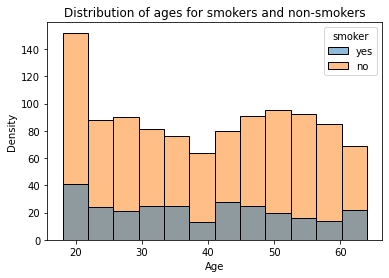

In [444]:
sns.histplot(x='age', data=insurance_data, hue='smoker')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of ages for smokers and non-smokers')
plt.show();

The graph shows that a larger number of smokers are 20 years old depicted with a density of 40. Therefore, it is at 20 years that smoking is most prevalent in this dataset.

### 6.2 What regions  contribute the highest insurance premiums?

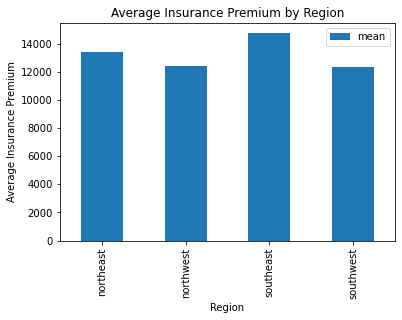

In [445]:
insurance_data.groupby('region')['expenses'].agg(['mean']).plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Average Insurance Premium')
plt.title('Average Insurance Premium by Region');

The graph above indicates the insurance premium means for each region. Individuals in the Southeast region make a higher contribution of about USD 14,500 while individuals in the Southwest region make contributions of USD 12,000.

### 6.3 Smoker vs Region

In [446]:
pd.crosstab(insurance_data['region'],insurance_data['smoker'])

smoker,no,yes
region,,
northeast,257,67
northwest,266,58
southeast,273,91
southwest,267,58


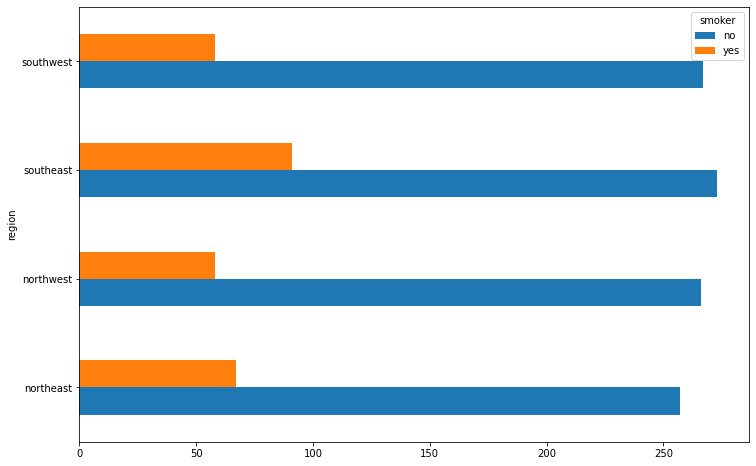

In [447]:
pd.crosstab(insurance_data['region'],
            insurance_data['smoker']).plot(kind = 'barh',figsize=(12,8));

### 6.4 Age vs Smoker vs Premium 

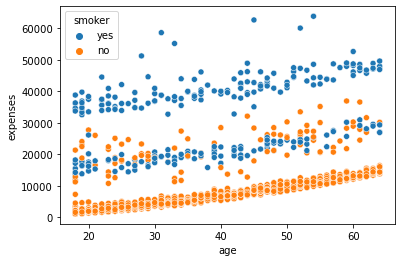

In [448]:
sns.scatterplot(data = insurance_data, x = 'age', y= 'expenses', hue='smoker');

From the scatter plot above, it can be noted that there are three classifications for premium payments. In each, there is an increment in the premiums as age increases. It would be important to investigate these 3 groups and their cause.

### 6.5 BMI vs Smoker vs Premium 

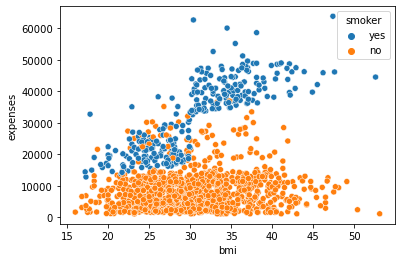

In [449]:
sns.scatterplot(data = insurance_data, x = 'bmi', y= 'expenses', hue= 'smoker');

The scatter plot above shows the relationship between BMI and expenses . The plot shows that there is a positive relationship between BMI and expenses, meaning that as BMI increases, expenses also increase. This may also indicate that as the BMI increases, there is a higher risk of incurring medical expenses, which would be in line with the insurance company's risk assessment process. It may also indicate a possible correlation between BMI and the likelihood of developing certain health condition, which could be a factor in determining insurance premiums.

### 6.6 Sex vs Premiums

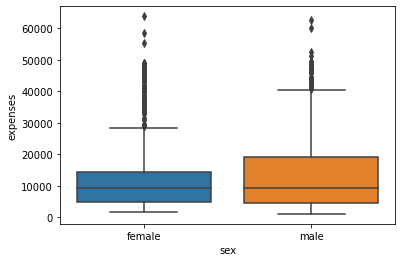

In [450]:
sns.boxplot(data = insurance_data, x='sex',y = 'expenses');


In the graph, you would see that the box for males would likely have a higher median premium expense than the box for females, this indicates that males on average pay more than females. Additionally, the whiskers for the males are longer which shows  that there are more outliers among males than among females.

### 6.7 Smoker vs Expenses

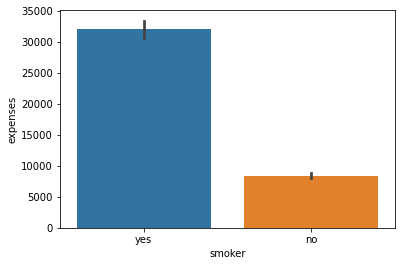

In [451]:
sns.barplot(data = insurance_data, x='smoker',y = 'expenses');

As per the above graph insurance premium is relatively higher for policyholders who smoke as compared to those who do not smoke. This can be alluded to the high health risks associated with smoking.

### 6.8 Children vs Expenses

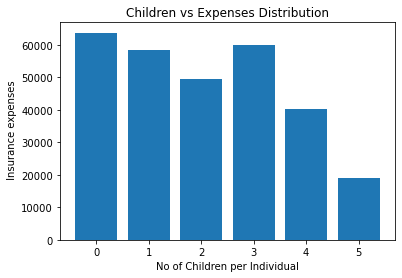

In [452]:
plt.bar(insurance_data['children'],insurance_data['expenses'])
plt.title('Children vs Expenses Distribution')
plt.xlabel('No of Children per Individual')
plt.ylabel(' Insurance expenses')
plt.show();


From the bar graph above, it can be noted that the mean amount of premium charged goes down as the number of children or dependents increases with the exception of 3 children. However, the premium charge should ideally go up with the increase of dependents. This could indicate an underlying reason as to why this is the case. For instance the distribution of dependents also follows a similar patten. Therefore, since there are more people with 0 dependents, then it makes sense that the mean amount of premium charged would be highest here and vice versa for people with 5 dependents.

In [453]:
# Ploting the bivariate summaries and recording our observations
insurance_data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


## 7. Data Modelling

In [454]:
# Data Correlation
insurance_data.corr()['expenses']

age         0.298308
bmi         0.198637
children    0.067389
expenses    1.000000
Name: expenses, dtype: float64

From the analysis above it can be noted that all the independent variables have a weak correlation, where the highest is age with 0.30, thus further anlysis will need to be undertaken on the data set.

In [455]:
!pip install category_encoders

In [456]:
# Creating a copy of the dataframe
insurance_data2 = insurance_data.copy()

In [457]:
# Dealing with categorical variables in our dataset using binary encoding
# Dropping extra columns from teh encoded variables

from category_encoders import BinaryEncoder
encoder = BinaryEncoder(cols = ['sex','smoker','region'])
newdata = encoder.fit_transform(insurance_data2[['sex','smoker','region']])
insurance_data2 = pd.concat([insurance_data2,newdata], axis=1)
insurance_data2 = insurance_data2.drop(['sex','smoker','region','sex_0','smoker_0','region_0'], axis=1)
insurance_data2.head(5)

,age,bmi,children,expenses,sex_1,smoker_1,region_1,region_2
0,19,27.9,0,16884.92,1,1,0,1
1,18,33.8,1,1725.55,0,0,1,0
2,28,33.0,3,4449.46,0,0,1,0
3,33,22.7,0,21984.47,0,0,1,1
4,32,28.9,0,3866.86,0,0,1,1


The data frame above includes encoded variables which makes the dataset more suitable to prepare a multiple linear regression model.  

In [458]:
y_all = insurance_data2['expenses']
X_all = insurance_data2.drop('expenses', axis=1)

# multiple linear regression model

model_all= sm.OLS(y_all, sm.add_constant(X_all))
results_all = model_all.fit()
results_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     568.6
Date:                Wed, 11 Jan 2023   Prob (F-statistic):               0.00
Time:                        16:43:46   Log-Likelihood:                -13541.
No. Observations:                1337   AIC:                         2.710e+04
Df Residuals:                    1329   BIC:                         2.714e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.203e+04   1001.838    -12.005      0.000    -1.4e+04   -1.01e+04
age          257.5733     11.929     21.593      0.000     234.173     280.974
bmi          323.2346     27.867     11.599      0.000     268.566     377.903
children     476.5725    138.140      3.450      0.001     205.577     747.568
sex_1        128.5256    333.786      0.385      0.700    -526.279     783.330
smoker_1    2.382e+04    413.914     57.544      0.000     2.3e+04    2.46e+04
region_1    -210.8898    335.272     -0.629      0.529    -868.610     446.830
region_2    -138.7395    336.016     -0.413      0.680    -797.919     520.440
==============================================================================
Omnibus:                      301.527   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              723.310
Skew:                           1.216   Prob(JB):                    8.62e-158
Kurtosis:                       5.659   Cond. No.                         312.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the model above, it can be noted that the model is statistically significant since the probability of the f-statistic is below 0.05.
Additionally, the model explains about 0.748 of the variance in insurance premiums (USD). 

With respect to the p-values of each independent variables, the following is deduced:

For age, bmi, children and smoker the p-value is <0.05 thus can be considered as statistically significant predictor variables. 

For sex and region the p-value is >0.05 thus can be considered not to be statistically significant predictor variables. 

In this case, the model will be :

y = 257.57**age** + 323.23**bmi** + 476.57**children** + 128.53**sex** + 2.382e+04**smoker** - 210.89**region_1** - 138.74**region_2** - 1.203e+04

In [459]:
#Computing the mean absolute error
y_pred_all = results_all.predict(sm.add_constant(X_all))
mean_absolute_error(y_all, y_pred_all)

4177.28353492673

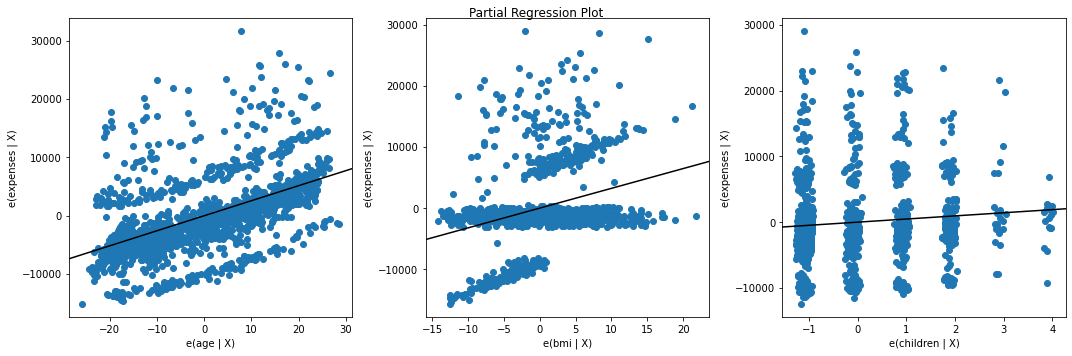

In [460]:
# Partial regression plots

fig = plt.figure(figsize=(15,5))
sm.graphics.plot_partregress_grid(
    results_all,
    exog_idx=list(X_all[['age','bmi','children']].columns.values),
    grid=(1,3),
    fig=fig)
plt.show()

The above graphs for the independent variables (age, bmi and children) show a linear relationship with the target variable (expenses). This means that an increase in the independent variable will lead to an increase in the target variable and the vice versa is true. 

However the strength for each independent variable varies. The age variable has a stronger relationship and this is evident where the graph has a steep slope and a high concentration of data points. On the other hand, the children variable also has a weak positive linear relationship which is shoen by the slightly sloped curve and scarcely distributed data points. 

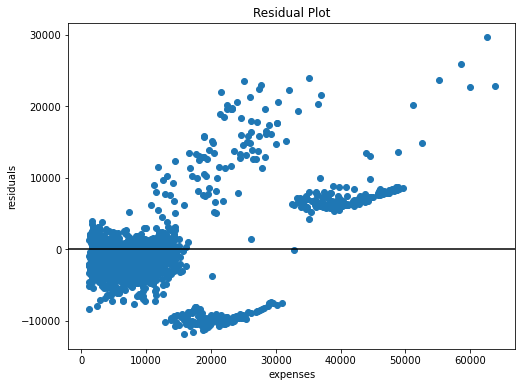

In [461]:
# Testing the linearity and heteroskedasticity assumption

fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(y_all, results_all.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("expenses")
ax.set_ylabel("residuals")
ax.set_title("Residual Plot");

The residual plot shows that there is some bit of non-linear relation between the predictors and the response. The plot also shows that there is some evidence of heteroskedasticity as the residual display a 'funnel-shape.

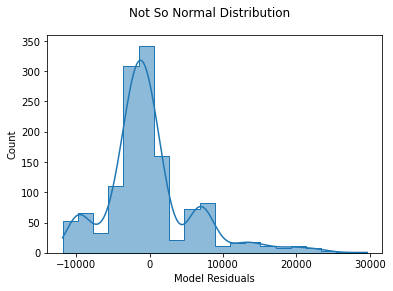

In [462]:
# normality assumption

fig, ax = plt.subplots()
sns.histplot(results_all.resid, bins=20, element="step", kde=True, ax=ax)
ax.set_xlabel("Model Residuals")
fig.suptitle("Not So Normal Distribution");

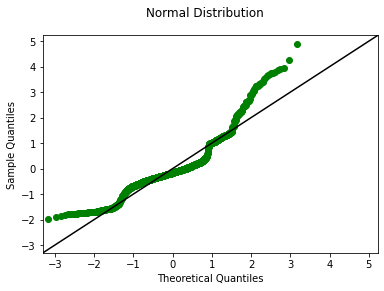

In [463]:
# Use qqplot function from StatsModels
fig, ax = plt.subplots()
sm.graphics.qqplot(results_all.resid, dist=stats.norm, line='45', fit=True, ax=ax)

# Customize plot appearance
scatter = ax.lines[0]
line = ax.lines[1]
scatter.set_markeredgecolor("green")
scatter.set_markerfacecolor("green")
line.set_color("black")
fig.suptitle("Normal Distribution");

From the above graphs, it is depicted that there exists a non-linear relationship between the predictor and target variables. Therefore, to normalize this, log transformations are carried out in the next steps.

In [464]:
log_transformed = np.log(X_all[['age','bmi']])
others = X_all.drop(['age','bmi'], axis=1)
print(others.head())
print(log_transformed.head())

   children  sex_1  smoker_1  region_1  region_2
0         0      1         1         0         1
1         1      0         0         1         0
2         3      0         0         1         0
3         0      0         0         1         1
4         0      0         0         1         1
        age       bmi
0  2.944439  3.328627
1  2.890372  3.520461
2  3.332205  3.496508
3  3.496508  3.122365
4  3.465736  3.363842


In [465]:
X_logtrans = pd.concat([log_transformed,others], axis=1)
X_logtrans.head()
y_log = np.log(y_all)
y_log

0        9.734176
1        7.453301
2        8.400538
3        9.998092
4        8.260198
          ...    
1333     9.268661
1334     7.698927
1335     7.396231
1336     7.604870
1337    10.279914
Name: expenses, Length: 1337, dtype: float64

In [466]:
log_model = sm.OLS(y_log, sm.add_constant(X_logtrans))
log_results = log_model.fit()
log_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     618.0
Date:                Wed, 11 Jan 2023   Prob (F-statistic):               0.00
Time:                        16:43:47   Log-Likelihood:                -815.20
No. Observations:                1337   AIC:                             1646.
Df Residuals:                    1329   BIC:                             1688.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9313      0.228     12.840      0.000       2.483       3.379
age            1.2479      0.032     39.434      0.000       1.186       1.310
bmi            0.3724      0.062      6.048      0.000       0.252       0.493
children       0.0823      0.010      8.077      0.000       0.062       0.102
sex_1          0.0744      0.025      3.032      0.002       0.026       0.123
smoker_1       1.5480      0.030     50.880      0.000       1.488       1.608
region_1      -0.0452      0.025     -1.834      0.067      -0.094       0.003
region_2      -0.0189      0.025     -0.768      0.443      -0.067       0.029
==============================================================================
Omnibus:                      504.904   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1933.014
Skew:                           1.821   Prob(JB):                         0.00
Kurtosis:                       7.630   Cond. No.                         101.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After conducting log transformations on the x and y variables, it can be noted that the model has imporoved. This is seen where the adjusted R-squared has increased to 0.764 from 0.748. This means that the model explains 76% of the variation in the insurance premiums.  

For each increase of 1% in <feature>, we see an associated change of <coefficient / 100> in <target>

In [467]:
# Computing the mean absolute error
y_pred_log = log_results.predict(sm.add_constant(X_logtrans))
mean_absolute_error(np.exp(y_log),np.exp(y_pred_log))

4139.615184671733

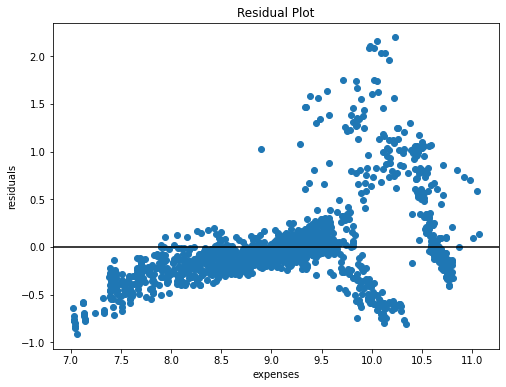

In [468]:
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(y_log, log_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("expenses")
ax.set_ylabel("residuals")
ax.set_title("Residual Plot");

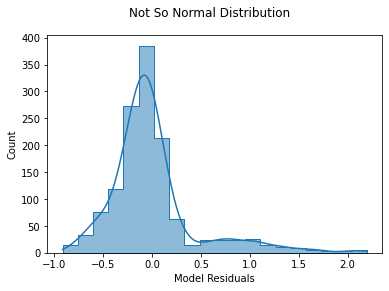

In [469]:
fig, ax = plt.subplots()
sns.histplot(log_results.resid, bins=20, element="step", kde=True, ax=ax)
ax.set_xlabel("Model Residuals")
fig.suptitle("Not So Normal Distribution");

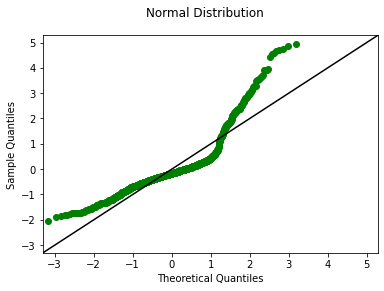

In [470]:
# Use qqplot function from StatsModels
fig, ax = plt.subplots()
sm.graphics.qqplot(log_results.resid, dist=stats.norm, line='45', fit=True, ax=ax)

# Customize plot appearance
scatter = ax.lines[0]
line = ax.lines[1]
scatter.set_markeredgecolor("green")
scatter.set_markerfacecolor("green")
line.set_color("black")
fig.suptitle("Normal Distribution");

In [471]:
# creating dataframe with interactions between bmi, age and smoker
X_inter = X_all.copy()
X_inter['age x smoker'] = X_inter.age * X_inter.smoker_1
X_inter['bmi x smoker'] = X_inter.bmi * X_inter.smoker_1
X_inter.head()

,age,bmi,children,sex_1,smoker_1,region_1,region_2,age x smoker,bmi x smoker
0,19,27.9,0,1,1,0,1,19,27.9
1,18,33.8,1,0,0,1,0,0,0.0
2,28,33.0,3,0,0,1,0,0,0.0
3,33,22.7,0,0,0,1,1,0,0.0
4,32,28.9,0,0,0,1,1,0,0.0


In [472]:
# Fitting model and displaying results
model_inter = sm.OLS(y_log, sm.add_constant(X_inter))
results_inter = model_inter.fit()
results_inter.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     675.3
Date:                Wed, 11 Jan 2023   Prob (F-statistic):               0.00
Time:                        16:43:48   Log-Likelihood:                -633.93
No. Observations:                1337   AIC:                             1288.
Df Residuals:                    1327   BIC:                             1340.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.0528      0.071     99.431      0.000       6.914       7.192
age              0.0416      0.001     48.487      0.000       0.040       0.043
bmi             -0.0010      0.002     -0.514      0.607      -0.005       0.003
children         0.1063      0.009     11.977      0.000       0.089       0.124
sex_1            0.0847      0.021      3.947      0.000       0.043       0.127
smoker_1         1.2829      0.147      8.706      0.000       0.994       1.572
region_1        -0.0286      0.022     -1.325      0.185      -0.071       0.014
region_2        -0.0351      0.022     -1.624      0.105      -0.077       0.007
age x smoker    -0.0333      0.002    -17.488      0.000      -0.037      -0.030
bmi x smoker     0.0507      0.004     11.933      0.000       0.042       0.059
==============================================================================
Omnibus:                      845.904   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7875.577
Skew:                           2.912   Prob(JB):                         0.00
Kurtosis:                      13.366   Cond. No.                         744.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [473]:
# Computing the mean absolute error
y_pred_inter = results_inter.predict(sm.add_constant(X_inter))
mean_absolute_error(np.exp(y_log), np.exp(y_pred_inter))

2790.1864624119894

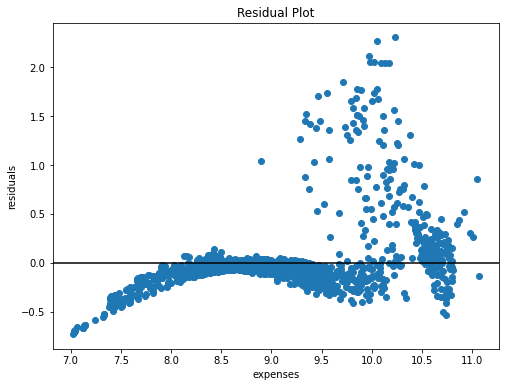

In [477]:
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(y_log, results_inter.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("expenses")
ax.set_ylabel("residuals")
ax.set_title("Residual Plot");

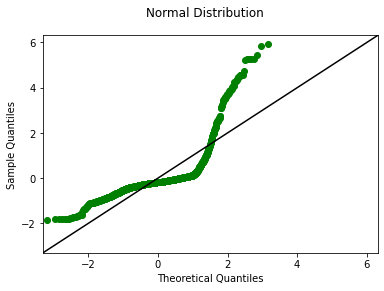

In [474]:
# Use qqplot function from StatsModels
fig, ax = plt.subplots()
sm.graphics.qqplot(results_inter.resid, dist=stats.norm, line='45', fit=True, ax=ax)

# Customize plot appearance
scatter = ax.lines[0]
line = ax.lines[1]
scatter.set_markeredgecolor("green")
scatter.set_markerfacecolor("green")
line.set_color("black")
fig.suptitle("Normal Distribution");

## 8. Insights

## 9. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [476]:
# Reviewing the Solution 
#

## 10. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?